In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1

def draw_plot(measurements, mlabel=None, estimates=None, estlabel=None, title=None, xlabel=None, ylabel=None):
    xvals = np.linspace(0, dt * len(measurements), len(measurements))
    plt.title(title, fontsize=12)
    
    xlabel and plt.xlabel("Time in seconds")
    ylabel and plt.ylabel("Distance to Wall in cm")
    
    ax = plt.subplot(111)
    
    ax.plot(measurements, label=mlabel)
    np.any(estimates) and estlabel and ax.plot(estimates, label=estlabel)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 1.1])

    ax.legend(loc='upper center', bbox_to_anchor=(.5, -0.05), ncol=3)
    plt.show()
    
def add_noise(data, size=20):
    noise = np.random.uniform(-1, 1, len(data)) * size
    return data + noise

### Part A

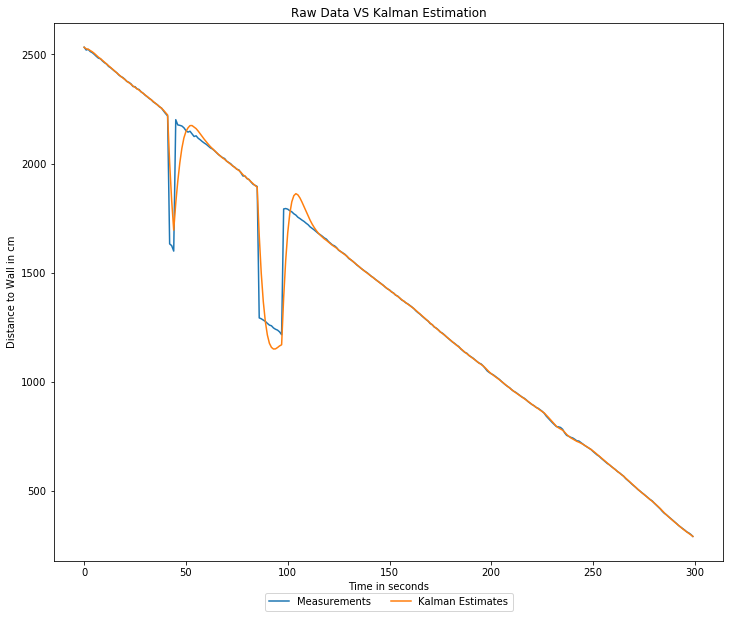

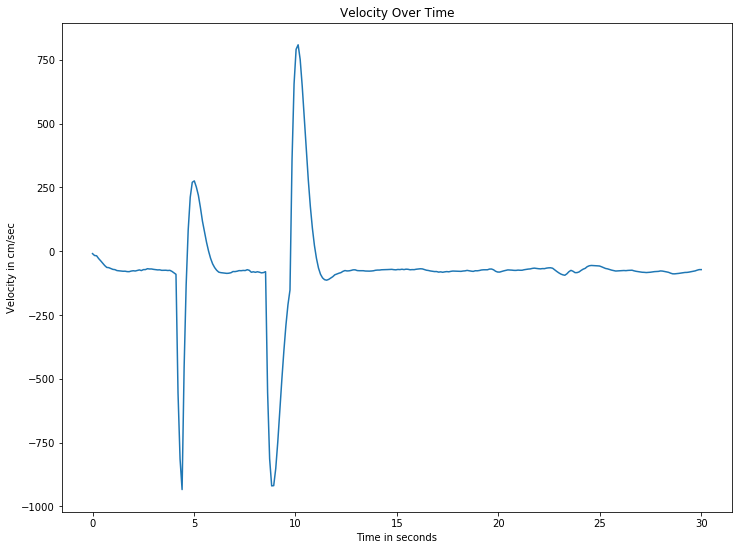

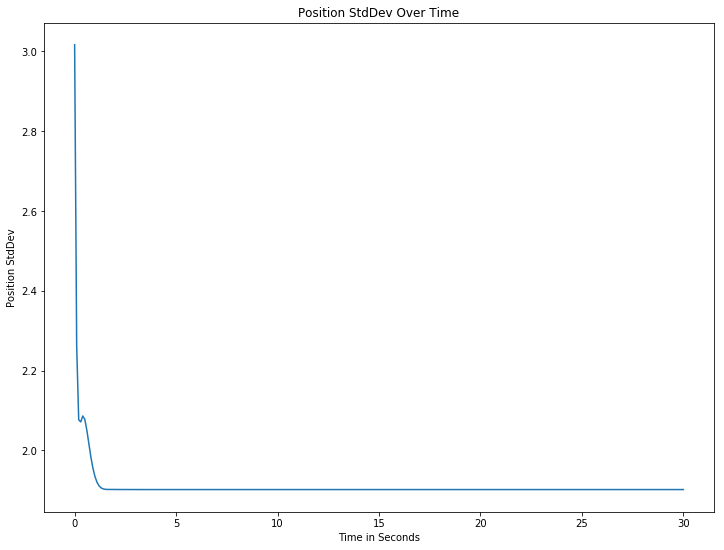

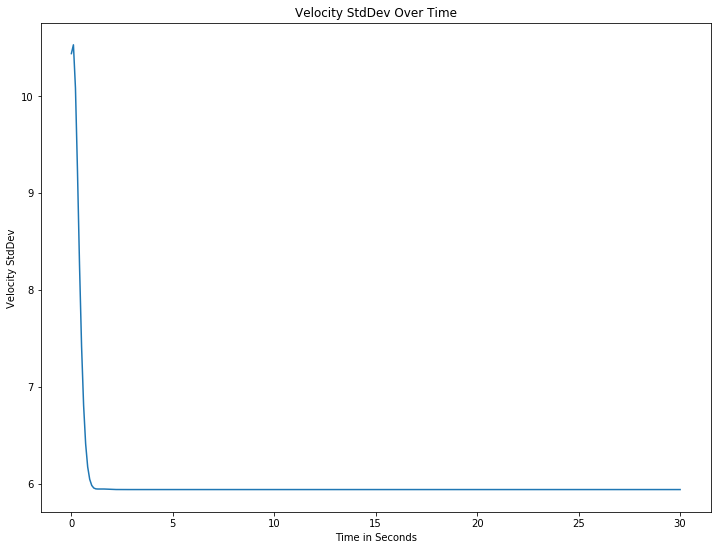

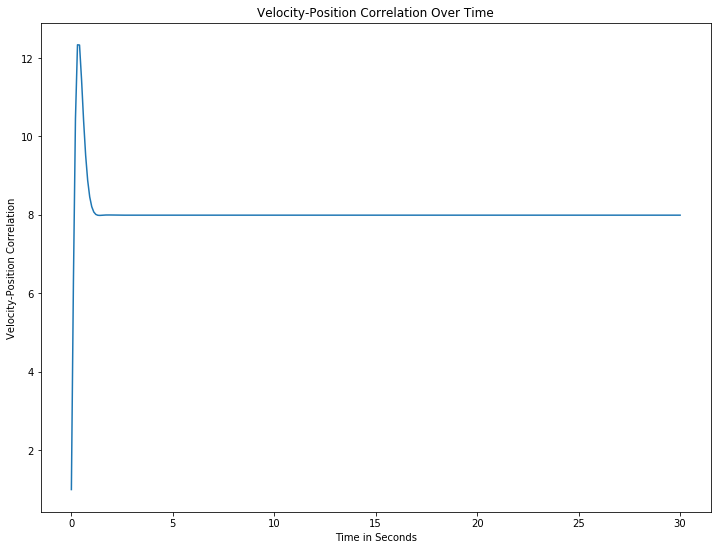

In [4]:
from kalman import predict, update, dot3

plt.rcParams["figure.figsize"] = [12, 9]

wall_file = "RBE500-F17-100ms-Constant-Vel.csv"

data = add_noise(np.loadtxt(wall_file, delimiter=","), 0)

# Setup initial variables and matrices
initial_pos = 2530
velocity = -10.0
variance = 10.0
dt = 0.1
F = np.array([[1., dt],
              [0., 1.]])
P = np.array([[100., 0],
              [0, 100.0]])
H = np.array([[1., 0.]])
R = np.array([[variance]])
Q = np.array([[0.1, 1], [1, 10.]])
x = np.array([initial_pos, velocity]).T

predicted_xs = []

def run(x, P, R, Q, dt, zs):
    # run the kalman filter and store the results
    xs, cov = [], []
    for z in zs:
        x, P = predict(x, P, F, Q)
        x, P = update(x, P, z, R, H)
        xs.append(x)
        cov.append(P)

    xs, cov = np.array(xs), np.array(cov)
    return xs, cov

time_values = np.linspace(0, dt * len(data), len(data))

est_x, est_P = run(x, P, R, Q, dt, data)
est_pos = [v[0] for v in est_x]
est_vel = [v[1] for v in est_x]
draw_plot(data, 
          estimates=est_pos, 
          title="Raw Data VS Kalman Estimation", 
          mlabel="Measurements",
          estlabel="Kalman Estimates",
          xlabel="Time in Seconds",
          ylabel="Distance to Wall in CM")

plt.plot(time_values, est_vel)
plt.xlabel("Time in seconds")
plt.ylabel("Velocity in cm/sec")
plt.title("Velocity Over Time")
plt.show()

pos_std = [p[0][0]**0.5 for p in est_P]
vel_var = [p[1][1]**0.5 for p in est_P]
pos_vel_corr = [p[0][1] for p in est_P]
plt.plot(time_values, pos_std)
plt.ylabel("Position StdDev")
plt.xlabel("Time in Seconds")
plt.title("Position StdDev Over Time")
plt.show()

plt.plot(time_values, vel_var)
plt.ylabel("Velocity StdDev")
plt.xlabel("Time in Seconds")
plt.title("Velocity StdDev Over Time")
plt.show()

plt.plot(time_values, pos_vel_corr)
plt.ylabel("Velocity-Position Correlation")
plt.xlabel("Time in Seconds")
plt.title("Velocity-Position Correlation Over Time")
plt.show()

### Part B

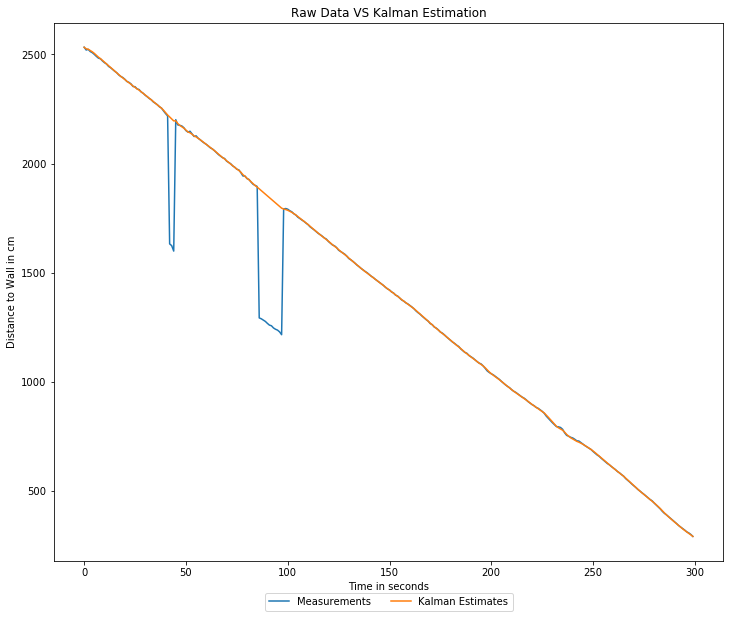

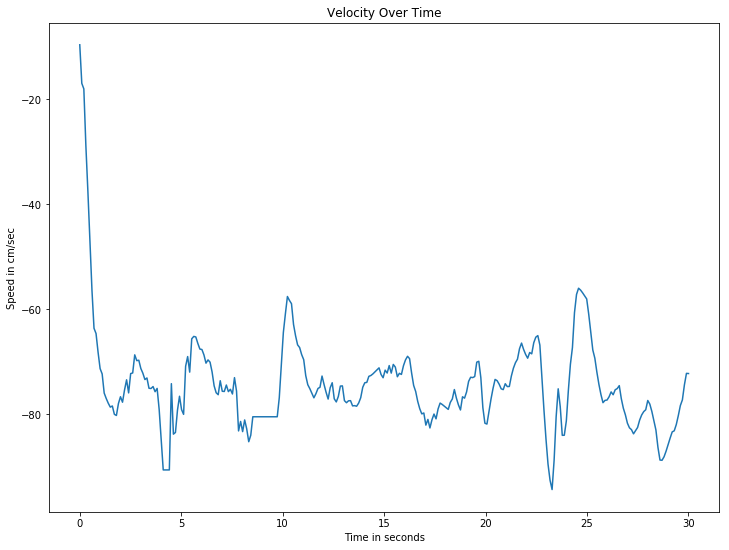

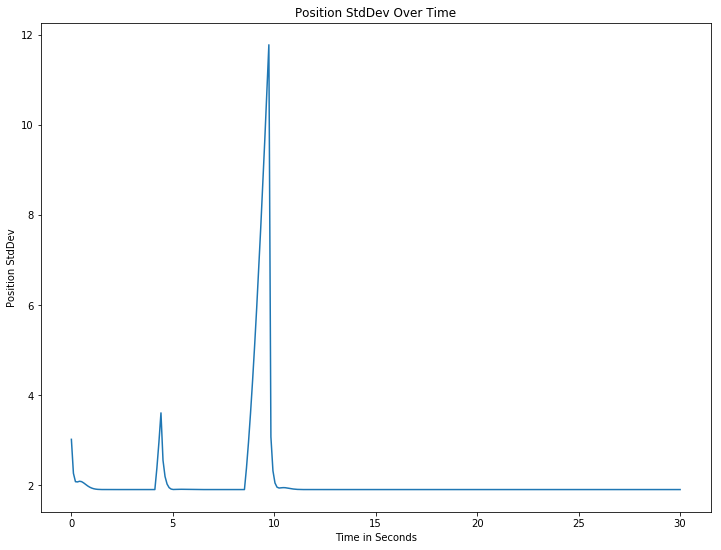

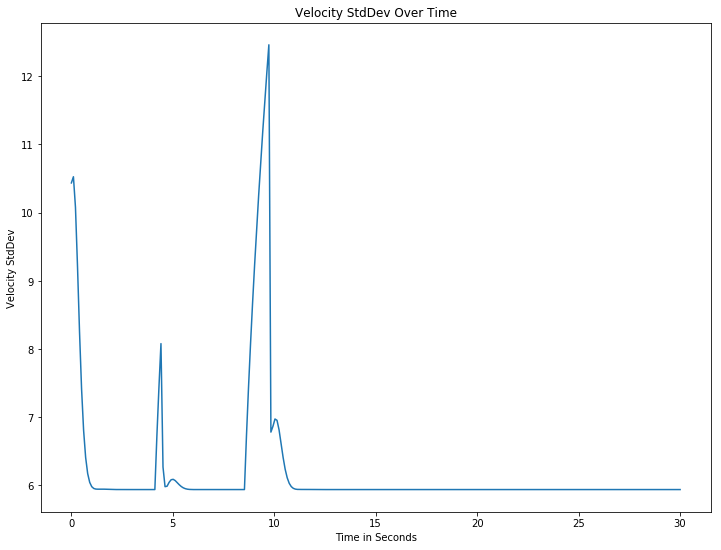

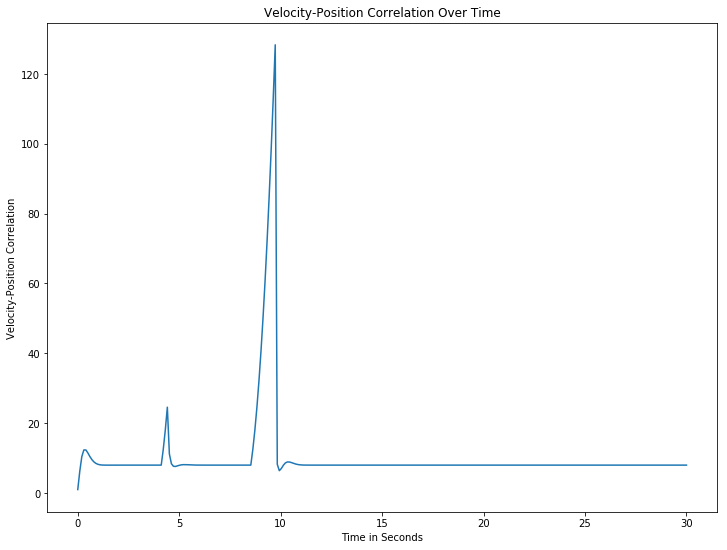

In [5]:
data = add_noise(np.loadtxt(wall_file, delimiter=","), 0)

# Setup initial variables and matrices
initial_pos = 2530
velocity = -10.0
variance = 10.0
dt = 0.1
F = np.array([[1., dt],
              [0., 1.]])
P = np.array([[100., 0],
              [0, 100.0]])
H = np.array([[1., 0.]])
R = np.array([[variance]])
Q = np.array([[0.1, 1], [1, 10.]])
x = np.array([initial_pos, velocity]).T

predicted_xs = []

def run(x, P, R=0, Q=0, dt=0.1, zs=None):
    # run the kalman filter and store the results
    xs, cov = [], []
    for z in zs:
        x, P = predict(x, P, F, Q)
        S = dot3(H, P, H.T) + R
        n = z - np.dot(H, x)
        d = n*n / S
        
        if d < 9.0:
            x, P = update(x, P, z, R, H)

        xs.append(x)
        cov.append(P)

    xs, cov = np.array(xs), np.array(cov)
    return xs, cov

time_values = np.linspace(0, dt * len(data), len(data))

est_x, est_P = run(x, P, R, Q, dt, data)
est_pos = [v[0] for v in est_x]
draw_plot(data, 
          estimates=est_pos, 
          title="Raw Data VS Kalman Estimation", 
          mlabel="Measurements",
          estlabel="Kalman Estimates",
          xlabel="Time in Seconds",
          ylabel="Distance to Wall in CM")

est_vel = [v[1] for v in est_x]
plt.plot(time_values, est_vel)
plt.xlabel("Time in seconds")
plt.ylabel("Speed in cm/sec")
plt.title("Velocity Over Time")
plt.show()

pos_std = [p[0][0]**0.5 for p in est_P]
vel_var = [p[1][1]**0.5 for p in est_P]
pos_vel_corr = [p[0][1] for p in est_P]
plt.plot(time_values, pos_std)
plt.ylabel("Position StdDev")
plt.xlabel("Time in Seconds")
plt.title("Position StdDev Over Time")
plt.show()

plt.plot(time_values, vel_var)
plt.ylabel("Velocity StdDev")
plt.xlabel("Time in Seconds")
plt.title("Velocity StdDev Over Time")
plt.show()

plt.plot(time_values, pos_vel_corr)
plt.ylabel("Velocity-Position Correlation")
plt.xlabel("Time in Seconds")
plt.title("Velocity-Position Correlation Over Time")
plt.show()


### Part C

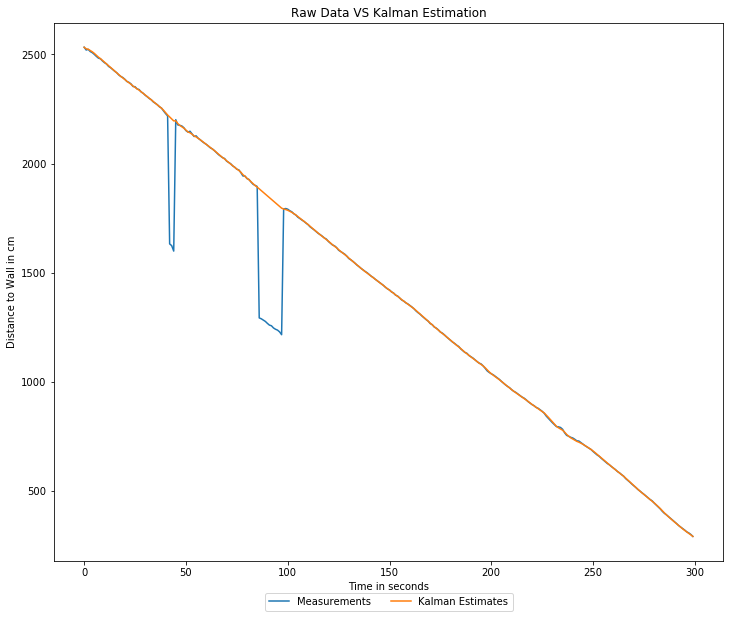

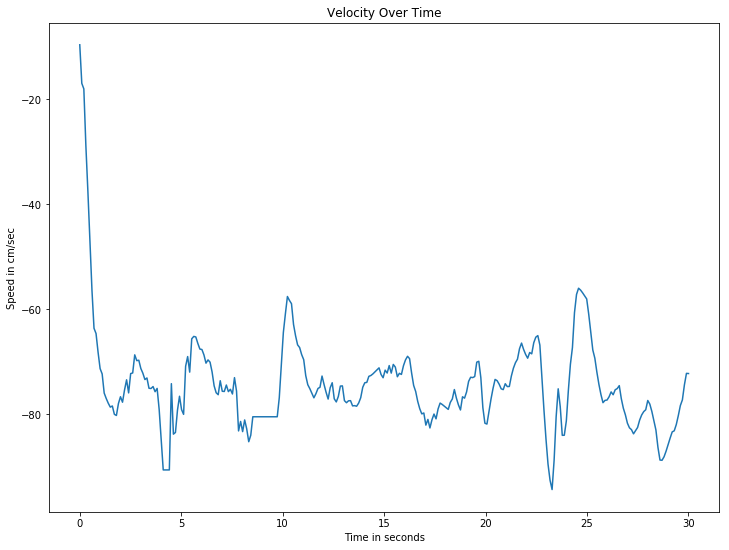

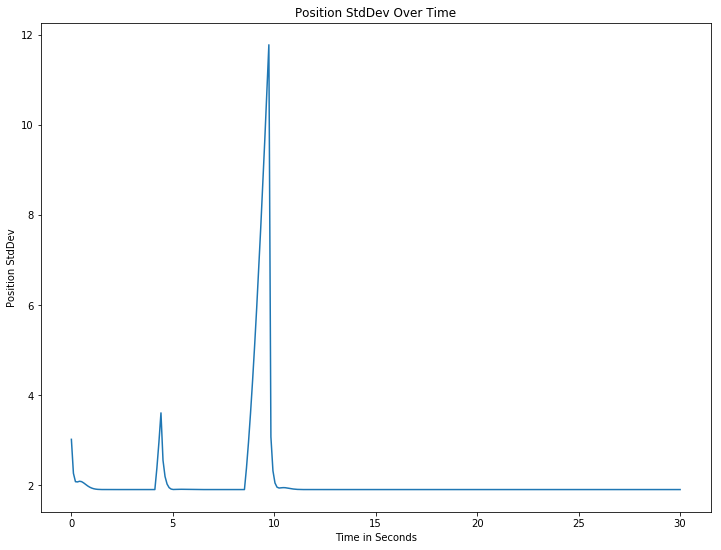

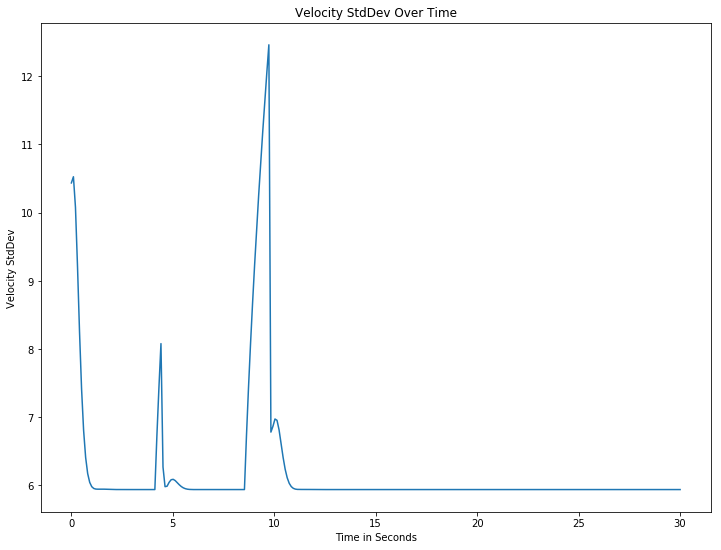

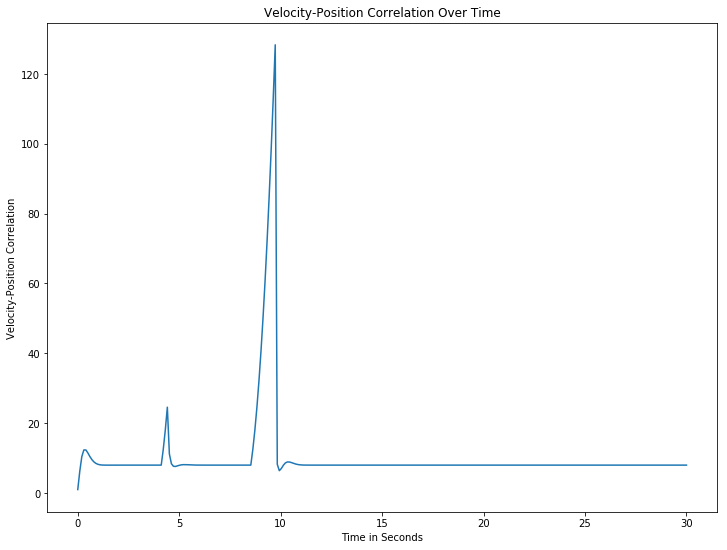

In [7]:
data = add_noise(np.loadtxt(wall_file, delimiter=","), 0)

def gaussian(x, mu, sig):
    return (1/(np.sqrt(2 * np.pi * np.power(sig, 2.)))) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Setup initial variables and matrices
initial_pos = 2530
velocity = -10.0
variance = 10.0
dt = 0.1
F = np.array([[1., dt],
              [0., 1.]])
P = np.array([[100., 0],
              [0, 100.0]])
H = np.array([[1., 0.]])
R = np.array([[variance]])
Q = np.array([[0.1, 1], [1, 10.]])
x = np.array([initial_pos, velocity]).T
xs = []

object_c = 0.2
wall_c = 0.8
lamb = 0.0005

def object_pdf(z):
    return object_c * lamb * np.exp(-lamb * z)

def wall_pdf(z, wall_mean):
    return wall_c * gaussian(z, wall_mean, variance)

def run(x, P, R, Q, dt, zs):
    # run the kalman filter and store the results
    xs, cov = [], []
    for z in zs:
        x, P = predict(x, P, F, Q)
        prob_wall = wall_pdf(x[0], z)
        prob_obj = object_pdf(z)

        if prob_obj < prob_wall:
            x, P = update(x, P, z, R, H)

        xs.append(x)
        cov.append(P)

    xs, cov = np.array(xs), np.array(cov)
    return xs, cov

old_est_x = est_x
est_x, est_P = run(x, P, R, Q, dt, data)

est_pos = [v[0] for v in est_x]
draw_plot(data, 
          estimates=est_pos, 
          title="Raw Data VS Kalman Estimation", 
          mlabel="Measurements",
          estlabel="Kalman Estimates",
          xlabel="Time in Seconds",
          ylabel="Distance to Wall in CM")

est_vel = [v[1] for v in est_x]
plt.plot(time_values, est_vel)
plt.xlabel("Time in seconds")
plt.ylabel("Speed in cm/sec")
plt.title("Velocity Over Time")
plt.show()

pos_std = [p[0][0]**0.5 for p in est_P]
vel_var = [p[1][1]**0.5 for p in est_P]
pos_vel_corr = [p[0][1] for p in est_P]
plt.plot(time_values, pos_std)
plt.ylabel("Position StdDev")
plt.xlabel("Time in Seconds")
plt.title("Position StdDev Over Time")
plt.show()

plt.plot(time_values, vel_var)
plt.ylabel("Velocity StdDev")
plt.xlabel("Time in Seconds")
plt.title("Velocity StdDev Over Time")
plt.show()

plt.plot(time_values, pos_vel_corr)
plt.ylabel("Velocity-Position Correlation")
plt.xlabel("Time in Seconds")
plt.title("Velocity-Position Correlation Over Time")
plt.show()


### Part D

1. Were any anomolous points processed by mistake?
    - Kalman filter without outlier detection processed object readings. Both methods of outlier detection succesfully removed object readings.
2. Were any valid points rejected?
    - Neither outlier detection method rejected valid points.
3. How can each of these methods fail?
    - As long as the data supplied is linear and linearly separable these methods should work robustly. If any of these constraints are broken all 3 methods would likely fail.